# Running on new images
This notebook will walk you step by step through the process of using a pre-trained model to detect traffic signs in an image.

# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import glob as glob

# Environment setup

In [3]:
%matplotlib inline
import sys
sys.path.append('/home/harsimrat/workspace/tf-models/research/object_detection')
from utils import label_map_util
from utils import visualization_utils as vis_util

# Tensorflow Object Detection API

## Model preparation 

In [4]:
MODELS_PATH = '/nas/team-space/experiments/turn_restrictions/models'
#MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous'
MODEL_NAME = 'faster_rcnn_resnet_101'
# MODEL_NAME = 'faster_rcnn_resnet50'
# MODEL_NAME = 'faster_rcnn_inception_v2'
# MODEL_NAME = 'rfcn_resnet101'
# MODEL_NAME = 'ssd_inception_v2'
# MODEL_NAME = 'ssd_mobilenet_v1'

In [5]:
PATH_TO_CKPT = '/data/experiments/synthetic-signs/training-with-templates-24-08-2019-exported/frozen_inference_graph.pb'
PATH_TO_LABELS = '/nas/team-space/experiments/turn_restrictions/synthetic-signs/tf-records-23-08-2019-100K/synthetic-signs-130.pbtxt'
NUM_CLASSES = 130

## Load a (frozen) Tensorflow model into memory

In [6]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `2`, we know that this corresponds to `mandatory`.

In [7]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(label_map)

item {
  name: "1000-10"
  id: 1
}
item {
  name: "1000-11"
  id: 2
}
item {
  name: "1000-12"
  id: 3
}
item {
  name: "1000-13"
  id: 4
}
item {
  name: "1000-20"
  id: 5
}
item {
  name: "1000-21"
  id: 6
}
item {
  name: "1000-22"
  id: 7
}
item {
  name: "1000-23"
  id: 8
}
item {
  name: "1000-30"
  id: 9
}
item {
  name: "1000-31"
  id: 10
}
item {
  name: "1000-32"
  id: 11
}
item {
  name: "1000-34"
  id: 12
}
item {
  name: "101"
  id: 13
}
item {
  name: "123"
  id: 14
}
item {
  name: "133-10"
  id: 15
}
item {
  name: "133-20"
  id: 16
}
item {
  name: "136-10"
  id: 17
}
item {
  name: "136-20"
  id: 18
}
item {
  name: "138-10"
  id: 19
}
item {
  name: "138-20"
  id: 20
}
item {
  name: "205"
  id: 21
}
item {
  name: "206"
  id: 22
}
item {
  name: "208"
  id: 23
}
item {
  name: "209"
  id: 24
}
item {
  name: "209-10"
  id: 25
}
item {
  name: "209-30"
  id: 26
}
item {
  name: "211"
  id: 27
}
item {
  name: "211-10"
  id: 28
}
item {
  name: "214"
  id: 29
}
item {

## Helper code

In [8]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

## Detection

In [12]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/home/harsimrat/workspace/traffic-sign-detection/test_images'
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))

# Size, in inches, of the output images.
IMAGE_SIZE = (20, 20)

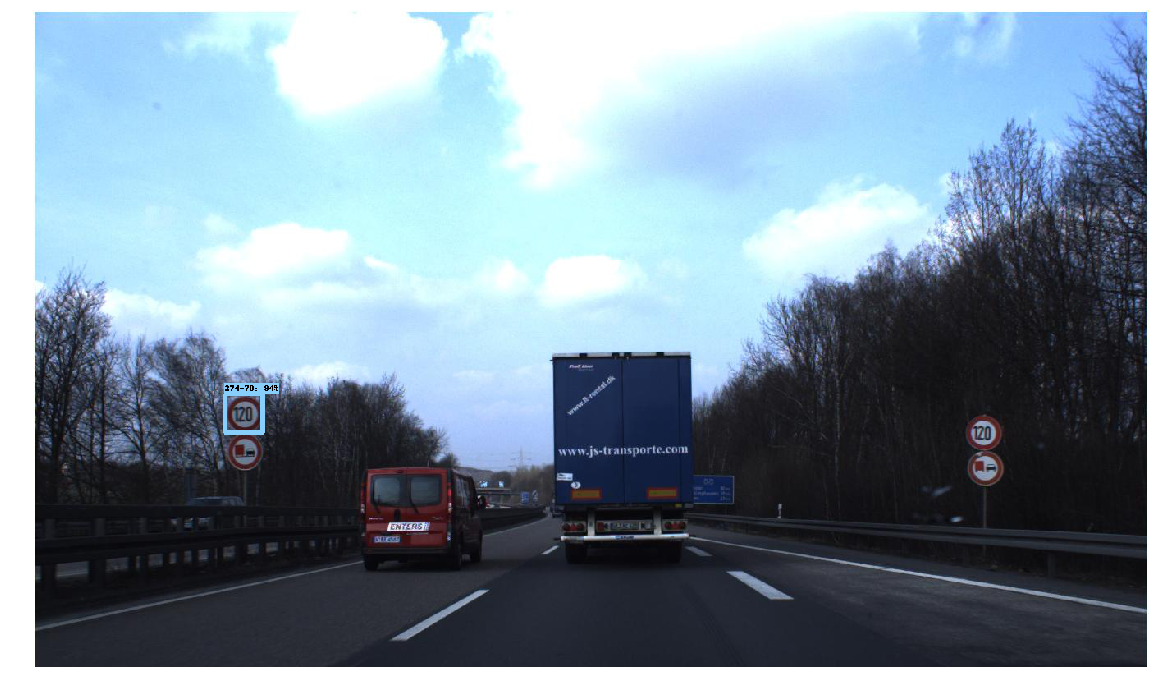

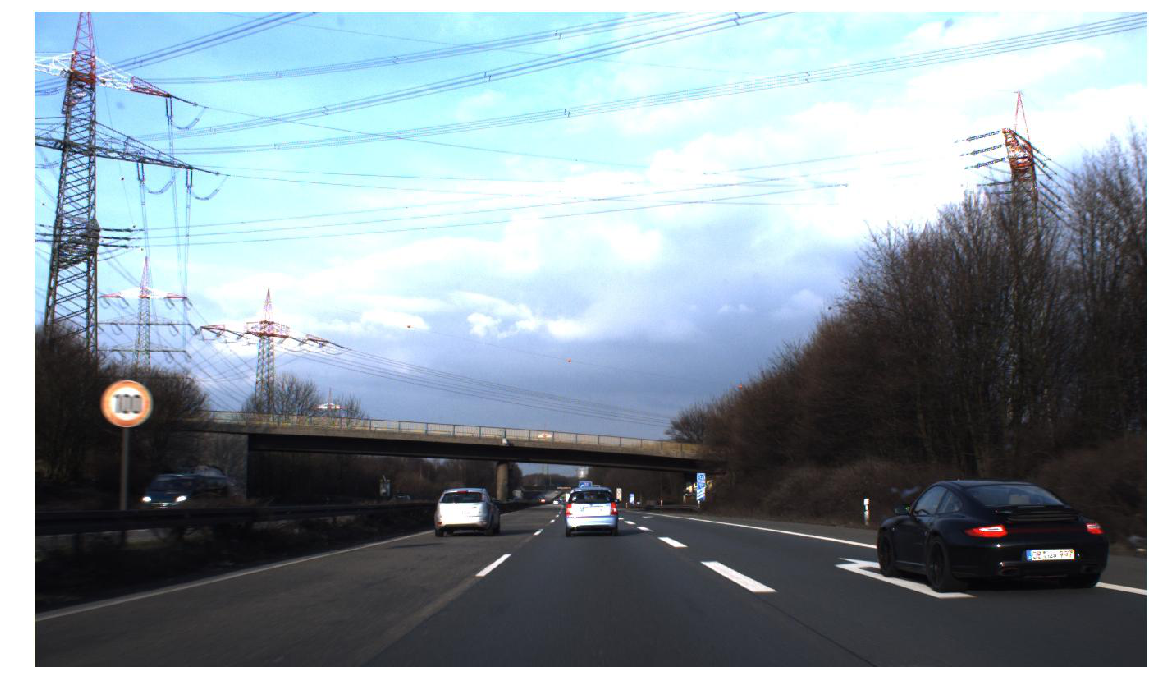

In [14]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for idx, image_path in enumerate(TEST_IMAGE_PATHS):
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            plt.figure(idx, figsize=IMAGE_SIZE)
            plt.axis('off')
            plt.imshow(image_np)

In [13]:
TEST_IMAGE_PATHS

['/home/harsimrat/workspace/traffic-sign-detection/test_images/image2.jpg',
 '/home/harsimrat/workspace/traffic-sign-detection/test_images/image1.jpg']